In [91]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [92]:
df=pd.read_csv('/Users/chowdaryadithyasaividivada/Downloads/sample.txt')

In [93]:
df['BHK']

0       2
1       2
2       2
3       2
4       2
       ..
4741    2
4742    3
4743    3
4744    3
4745    2
Name: BHK, Length: 4746, dtype: int64

In [94]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


(4746, 12)

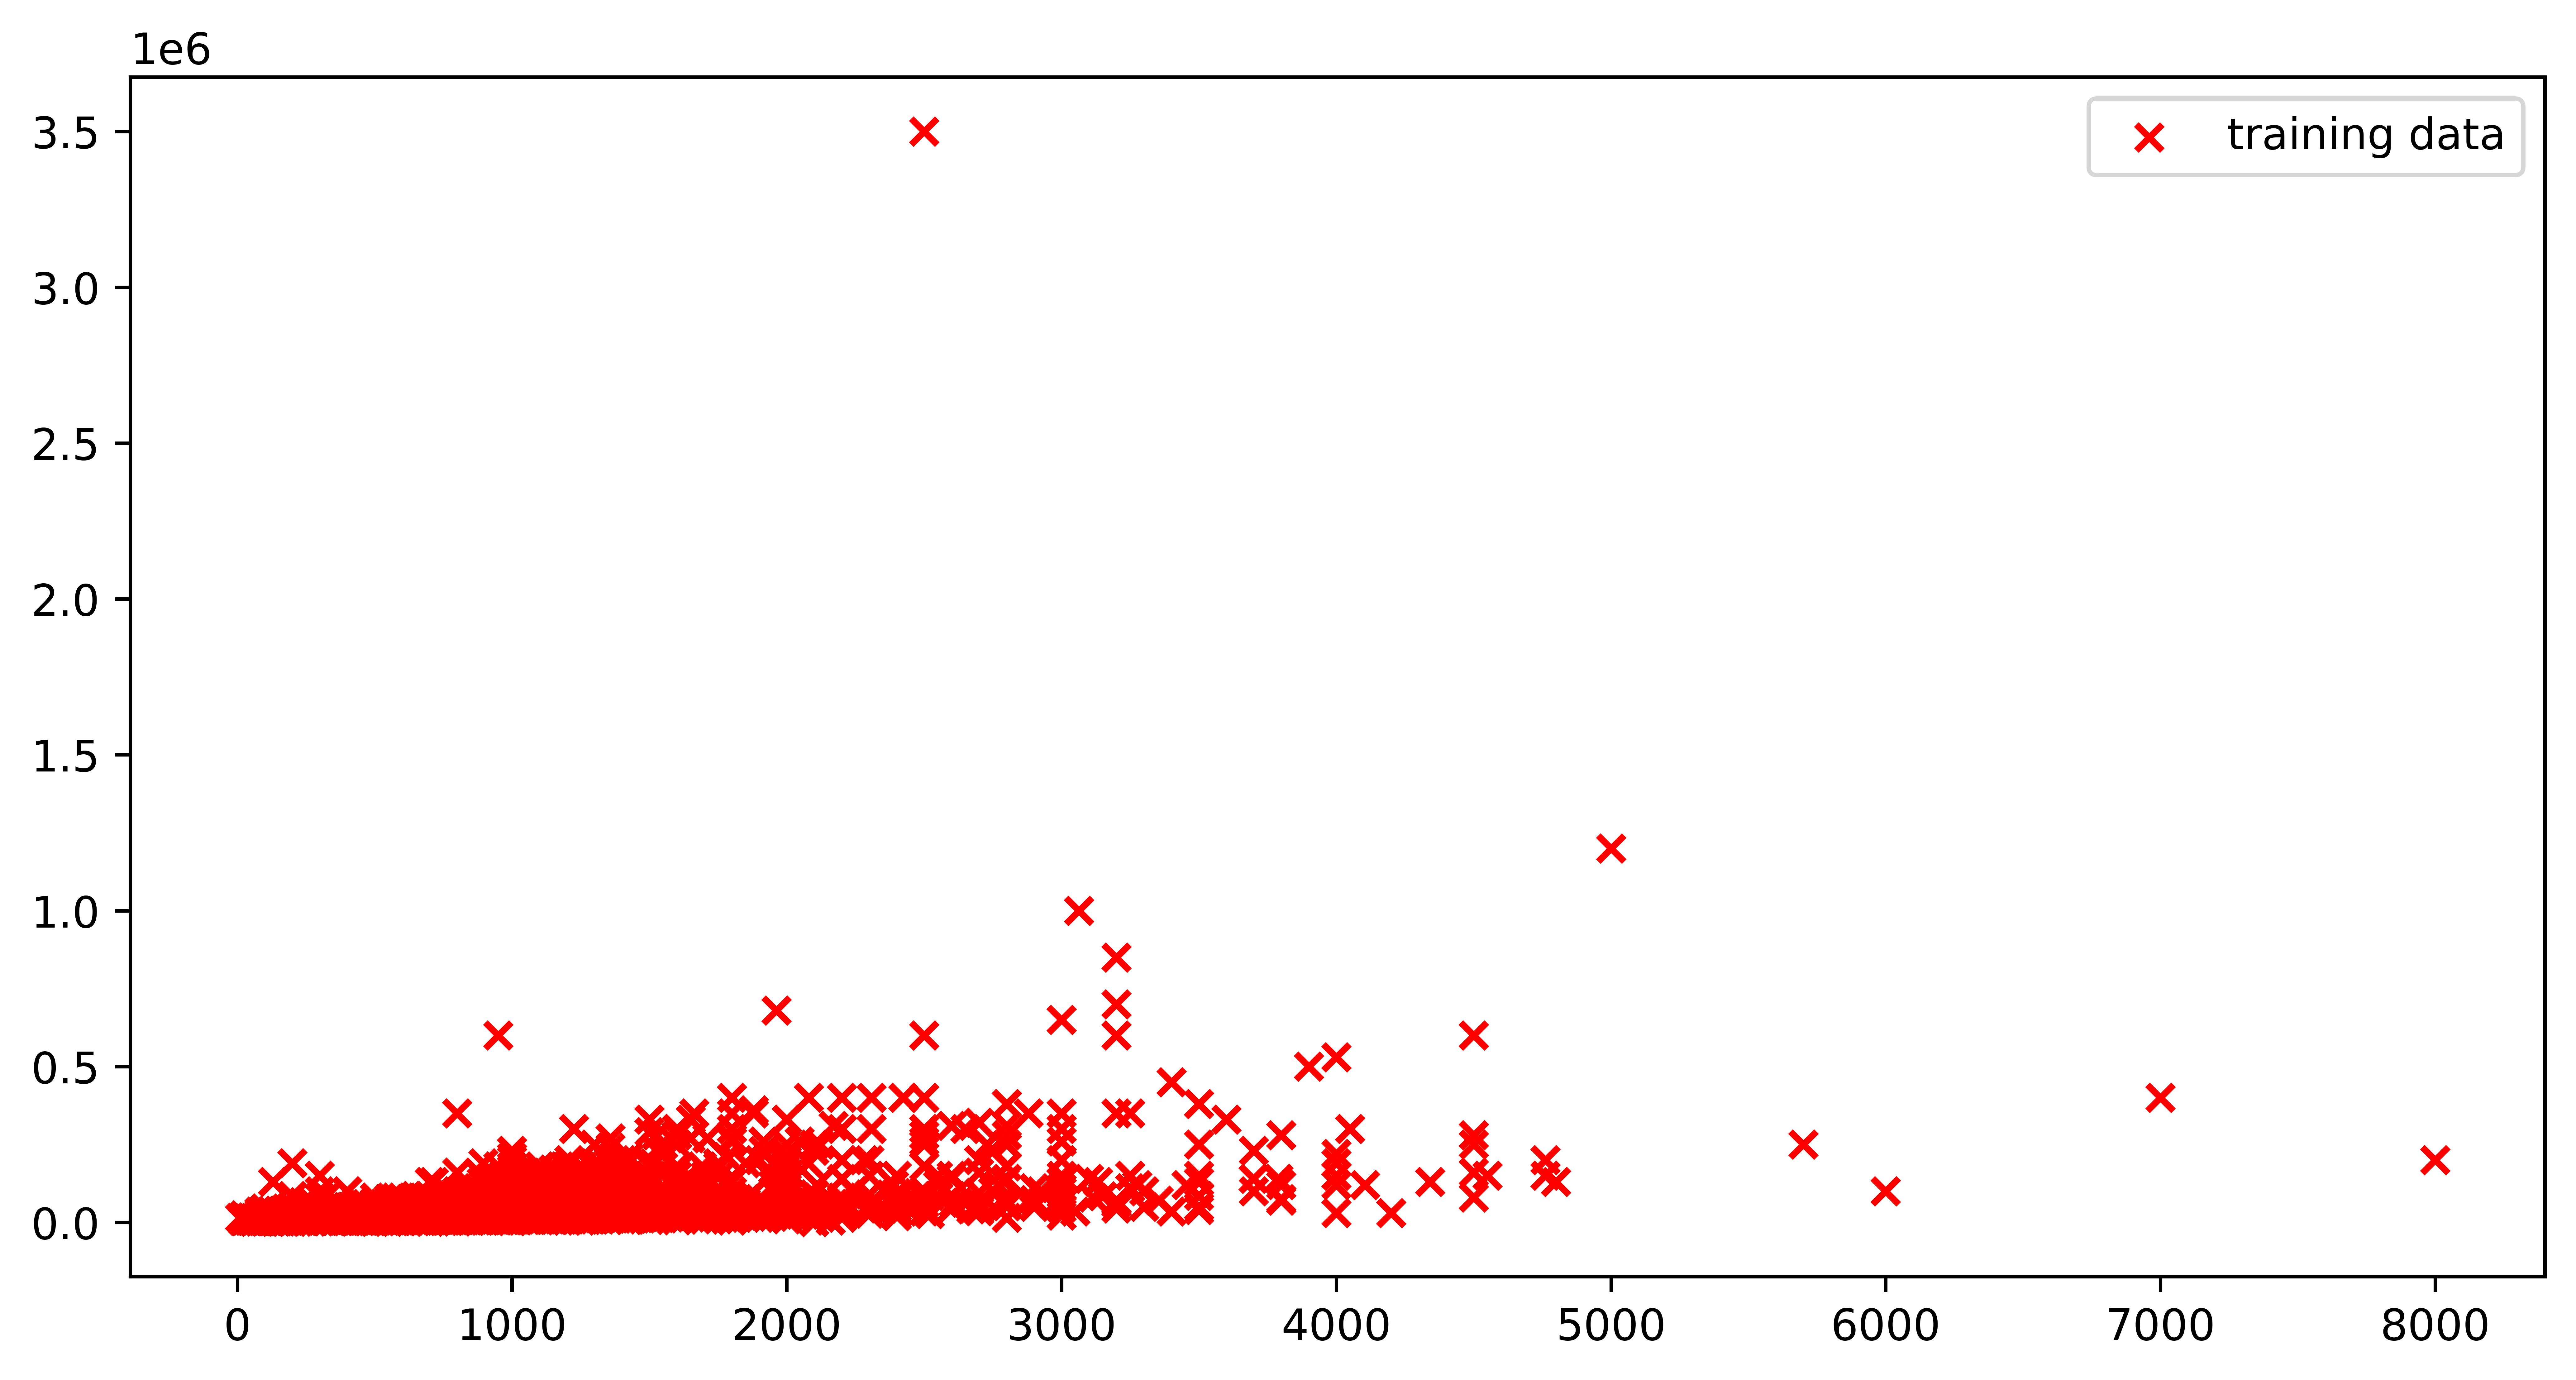

In [96]:
figax=plt.subplots(figsize=(10,5),dpi=1000)
plt.scatter(df['Size'],df['Rent'],marker='x',color='red',label='training data')
plt.legend()
df.shape

In [97]:
def cost(df,w):
    cost=0
    m=df.shape[0]
    for i in range(m):
        cost=cost+(df['Rent'][i]-(w*df['Size'][i]))**2
    cost=cost*(1/(2*m))
    return cost


In [98]:
cost(df,0)

3661933977.985251

In [99]:
m1=df.shape[0]
los=[]

minimum=cost(df,0)
for i in range(1000):
    if(cost(df,i)<minimum):
        minimum=cost(df,i)
        w=i

    los.append(cost(df,i))

los

[3661933977.985251,
 3608266189.662769,
 3555936567.4955754,
 3504945111.4836707,
 3455291821.6270547,
 3406976697.925727,
 3359999740.3796883,
 3314360948.9889383,
 3270060323.7534766,
 3227097864.673304,
 3185473571.74842,
 3145187444.9788246,
 3106239484.3645177,
 3068629689.9054995,
 3032358061.60177,
 2997424599.453329,
 2963829303.460177,
 2931572173.6223135,
 2900653209.9397388,
 2871072412.4124527,
 2842829781.0404553,
 2815925315.823746,
 2790359016.7623262,
 2766130883.856195,
 2743240917.105352,
 2721689116.509798,
 2701475482.0695324,
 2682600013.7845554,
 2665062711.654867,
 2648863575.680468,
 2634002605.861357,
 2620479802.197535,
 2608295164.6890016,
 2597448693.3357563,
 2587940388.1378,
 2579770249.095133,
 2572938276.207754,
 2567444469.4756637,
 2563288828.8988624,
 2560471354.4773493,
 2558992046.2111254,
 2558850904.1001897,
 2560047928.1445427,
 2562583118.344185,
 2566456474.6991153,
 2571667997.2093344,
 2578217685.874842,
 2586105540.6956387,
 2595331561.67172

In [100]:
loss=np.array(los)

In [101]:
np.min(loss)
print(df.shape)



(4746, 12)


In [102]:
print(w)

41


In [103]:
line=[]
for i in range(df.shape[0]):
    line.append(w*df['Size'][i])
line

[45100,
 32800,
 41000,
 32800,
 34850,
 24600,
 28700,
 10250,
 32800,
 41000,
 49200,
 16400,
 10250,
 15375,
 36900,
 52726,
 24600,
 32800,
 82000,
 27060,
 26650,
 16400,
 12300,
 65600,
 16400,
 41000,
 14555,
 41000,
 32800,
 34850,
 14350,
 36900,
 22550,
 20500,
 45100,
 34850,
 32800,
 25830,
 36900,
 11070,
 25830,
 61500,
 24600,
 28700,
 12300,
 53300,
 16400,
 26650,
 82000,
 43788,
 6150,
 18450,
 32800,
 41000,
 36900,
 24600,
 49200,
 49200,
 26650,
 29520,
 12300,
 49200,
 28700,
 82000,
 10250,
 45100,
 12300,
 24600,
 32800,
 27880,
 27880,
 34850,
 34850,
 28700,
 61500,
 38950,
 20500,
 18450,
 28700,
 20500,
 73800,
 20500,
 19680,
 41000,
 32800,
 17835,
 28700,
 32800,
 18450,
 22550,
 32800,
 22550,
 24600,
 20500,
 41000,
 12300,
 49200,
 20500,
 49200,
 36900,
 53300,
 65600,
 59450,
 45100,
 38950,
 24600,
 28700,
 30750,
 41000,
 9020,
 12300,
 12300,
 28700,
 32800,
 65600,
 41000,
 820,
 16400,
 8200,
 34440,
 12300,
 22550,
 12300,
 32800,
 30340,
 5330

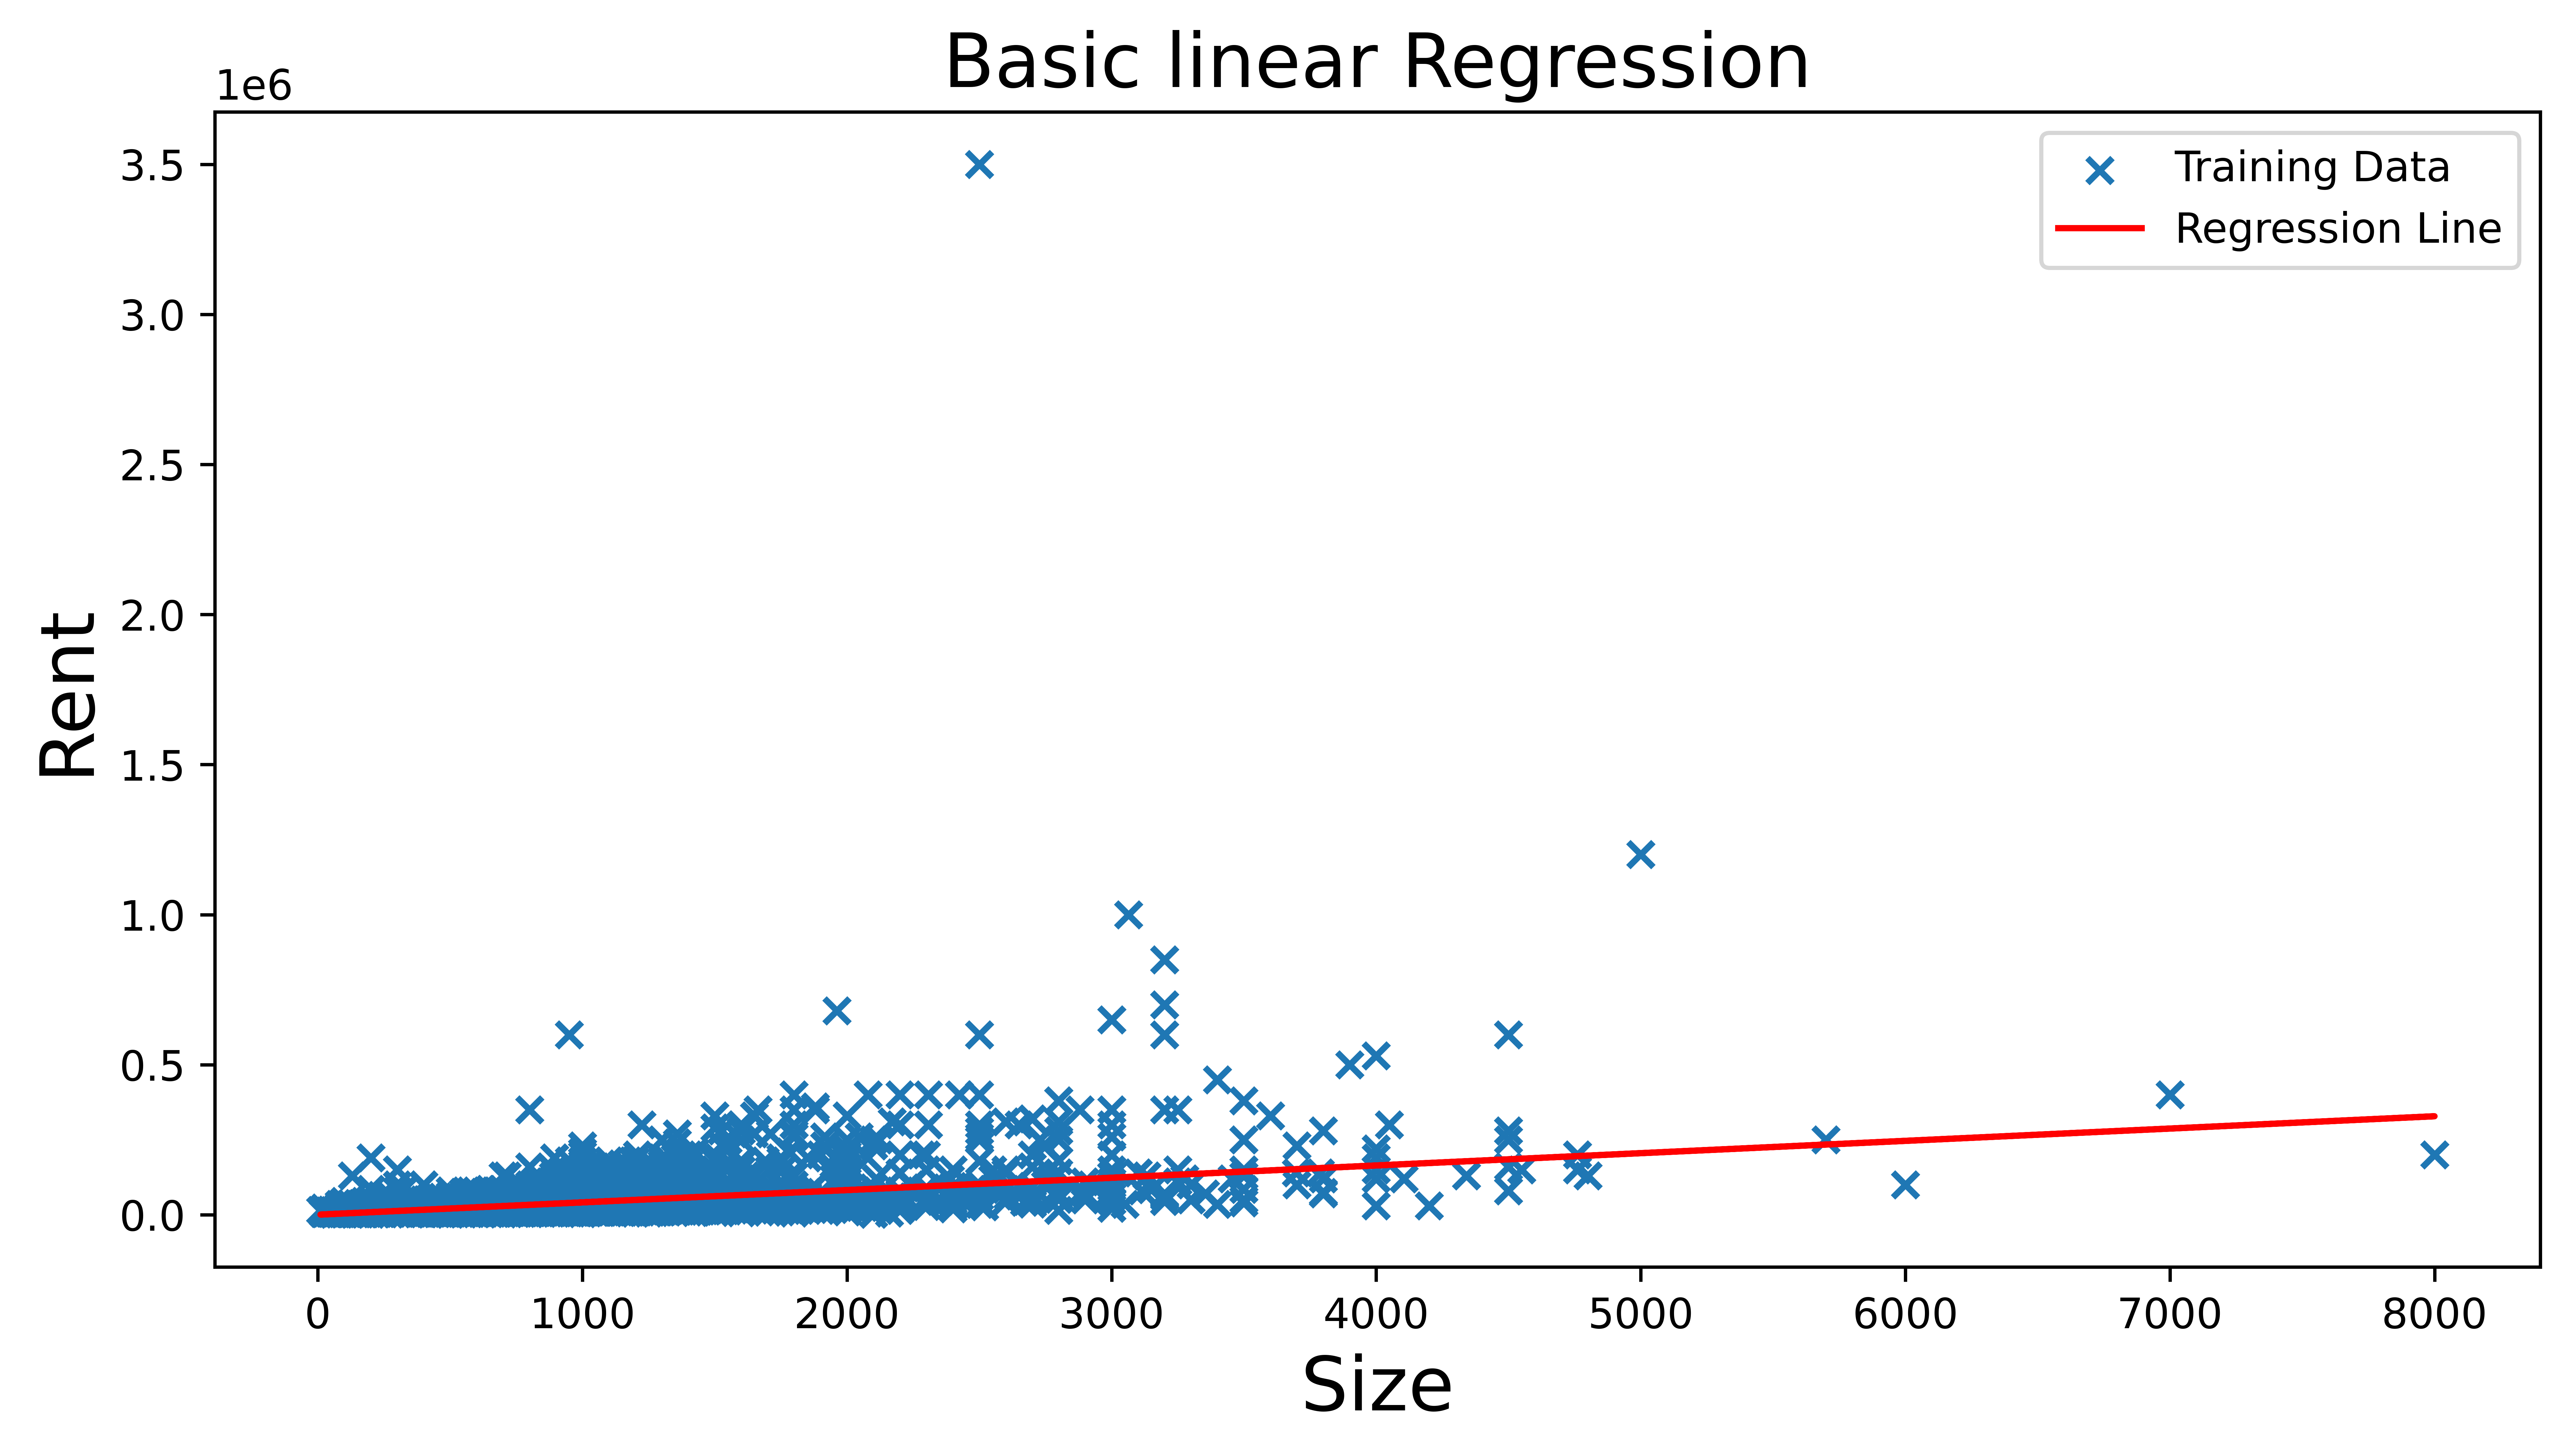

In [104]:
fig,ax=plt.subplots(figsize=(10,5),dpi=1000)
plt.scatter(df['Size'],df['Rent'],marker='x',label='Training Data')
plt.title("Basic linear Regression",fontdict={'fontsize':18})
plt.plot(df['Size'],line,color='red',label='Regression Line')
plt.xlabel('Size',fontsize=18)
plt.ylabel('Rent',fontsize=18)
plt.legend()

In [105]:
print(w*2500)

102500
